In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.13.1

Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 345.0MB 17kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 368kB 56.8MB/s 
     |████████████████████████████████| 3.2MB 48.6MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1


In [ ]:
import tensorflow as tf

print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [ ]:
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
import tensorflow as tf

print('tensorflow version = {}'.format( tf.__version__ ))

tensorflow version = 1.13.1


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool( x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [ ]:
img = mnist.train.images[0].reshape(28,28)

In [ ]:
label = mnist.train.labels[0]

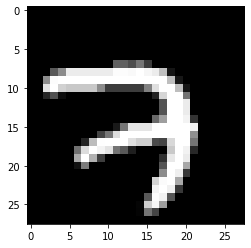

In [ ]:
plt.imshow( img, cmap='gray' )
plt.show()

In [ ]:
label

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1 )
    return tf.Variable(initial)

In [ ]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape )
    return tf.Variable(initial)

In [ ]:
import functools
from operator import mul
def tensor_size(tensor):
    return functools.reduce( mul, (d.value for d in tensor.get_shape()),1 )

In [ ]:
def get_variables(sess):
    all_vars = tf.trainable_variables()
    variable_dict = {}
    sum = 0
    for var in all_vars:
        variable_dict[var.name] = sess.run(var)
        t_size = tensor_size(var)
        sum = sum + t_size
        print("{} {} {}".format(var.name, var.get_shape(), t_size))
    print(sum)
    return variable_dict

In [ ]:
def initialize_model( sess, saver, train_dir, expect_exists = False, init_op = True):
    ckpt = tf.train.get_checkpoint_state(train_dir)
    v2_path = ckpt.model_checkpoint_path + ".index" if ckpt else ""
    init_op = tf.group( [tf.global_variables_initializer(), tf.local_variables_initializer()] )
    pathname = None
    if ckpt and (tf.gfile.Exists(ckpt.model_checkpoint_path) or tf.gfile.Exists(v2_path)):
        print(f"Reading model parameters from {ckpt.model_checkpoint_path}")
        if init_op is True:
            sess.run( init_op )
        saver.restore(sess, ckpt.model_checkpoint_path)
        pathname = os.path.basename(ckpt.model_checkpoint_path)
        return ckpt.model_checkpoint_path, pathname
    else:
        if expect_exists:
            raise Exception(f"There is no saved checkpoint at {train_dir}")
        else:
            print(f"There is no saved checkpoint at {train_dir}. Creating model with fresh parameters.")
            sess.run( init_op )
        return None, pathname

In [ ]:
tf.reset_default_graph()

x = tf.placeholder( tf.float32, shape=[None,784] )
y_ = tf.placeholder( tf.float32, shape=[None,10] )

x_image = tf.reshape( x, [-1,28,28,1] )


with tf.name_scope('Conv1'):
    W_conv1 = weight_variable([5,5,1,32])
    b_conv1 = bias_variable([32])

    h_conv1 = tf.nn.relu( conv2d(x_image,W_conv1 ) + b_conv1)
    h_pool1 = max_pool_2x2( h_conv1 )

with tf.name_scope('Conv2'):
    W_conv2 = weight_variable([5,5,32,64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu( conv2d(h_pool1,W_conv2 ) + b_conv2)
    h_pool2 = max_pool_2x2( h_conv2 )
    h_pool2 = tf.reshape( h_pool2, [-1, 7*7*64 ])

with tf.name_scope('FC1'):
    W_fc1 = weight_variable([7*7*64,1024])
    b_fc1 = bias_variable([1024])

    h_fc1 = tf.nn.relu( tf.matmul( h_pool2, W_fc1 ) + b_fc1)

with tf.name_scope('FC2'):
    W_fc2 = weight_variable([1024,10])
    b_fc2 = bias_variable([10])
    h_fc2 = tf.matmul( h_fc1, W_fc2 ) + b_fc2


with tf.name_scope('optimizer'):
    global_step = tf.Variable(0, trainable=True)
    cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( labels = y_ , logits = h_fc2 ))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy, global_step = global_step )

with tf.name_scope('accuracy'):
    prediction = tf.argmax(h_fc2,-1)
    gtlabel = tf.argmax(y_,-1)
    correct_prediction = tf.equal( prediction, gtlabel )
    accuracy = tf.reduce_mean( tf.cast(correct_prediction,tf.float32) )

    
tf.summary.scalar('training_accuracy',accuracy )
tf.summary.scalar('cross_entropy',cross_entropy )
tf.summary.image("input",x_image[:2,...] )
summaries = tf.summary.merge_all()

saver = tf.train.Saver( max_to_keep = 3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
path = './graph_log'
with tf.Session() as sess:
    variables = get_variables(sess)
    
    writer = tf.summary.FileWriter(path, graph = sess.graph )
    initialize_model( sess, saver, path )
    
    for i in range(10000):
        batch = mnist.train.next_batch(50)
        _, _global_step, _summaries = sess.run( [train_step, global_step, summaries], feed_dict={x:batch[0], y_:batch[1]} )
        #writer.add_summary( _summaries, _global_step ) 
        
        if i % 500 == 0:
            _test_accuracy = sess.run( [accuracy], feed_dict={x:mnist.test.images, y_:mnist.test.labels})
            print( "test accuracy = {}".format(_test_accuracy))
        
        if i % 500 == 0:
            saver.save( sess, path + "/myckpt", global_step = _global_step )

There is no saved checkpoint at ./graph_log. Creating model with fresh parameters.
test accuracy = [0.0979]
test accuracy = [0.9452]
test accuracy = [0.9621]
test accuracy = [0.9676]
Instructions for updating:
Use standard file APIs to delete files with this prefix.
test accuracy = [0.9787]
test accuracy = [0.9831]
test accuracy = [0.9859]
test accuracy = [0.9858]
test accuracy = [0.983]
test accuracy = [0.9857]
test accuracy = [0.9878]
test accuracy = [0.9855]
test accuracy = [0.9874]
test accuracy = [0.9877]
test accuracy = [0.9892]
test accuracy = [0.9875]
test accuracy = [0.9899]
test accuracy = [0.9886]
test accuracy = [0.9901]
test accuracy = [0.9874]
Conv1/Variable:0 (5, 5, 1, 32) 800
Conv1/Variable_1:0 (32,) 32
Conv2/Variable:0 (5, 5, 32, 64) 51200
Conv2/Variable_1:0 (64,) 64
FC1/Variable:0 (3136, 1024) 3211264
FC1/Variable_1:0 (1024,) 1024
FC2/Variable:0 (1024, 10) 10240
FC2/Variable_1:0 (10,) 10
optimizer/Variable:0 () 1
3274635


In [ ]:
path = './graph_log'
with tf.Session() as sess:
    writer = tf.summary.FileWriter(path, graph = sess.graph )
    initialize_model( sess, saver, path )
    
    _test_accuracy, _prediction, _gtlabel, _correct_prediction = sess.run( [accuracy, prediction, gtlabel, correct_prediction ], \
                                                             feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    print( "test accuracy = {}".format(_test_accuracy))

Reading model parameters from ./graph_log/myckpt-9501
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./graph_log/myckpt-9501
test accuracy = 0.9873999953269958


In [ ]:
findex = np.where( _correct_prediction == False )

In [ ]:
findex[0].shape

(126,)

In [ ]:
fimages = mnist.test.images[findex].reshape(-1,28,28)

In [ ]:
f_gtlabels = _gtlabel[findex]

In [ ]:
f_predictedlabels = _prediction[findex]

3 -> 8
4 -> 2
5 -> 3
3 -> 2
6 -> 0


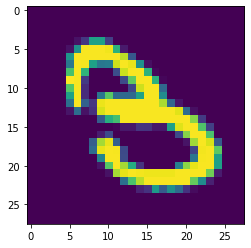

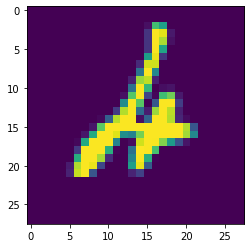

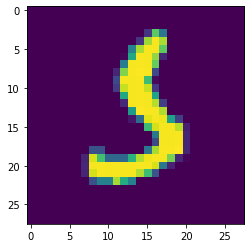

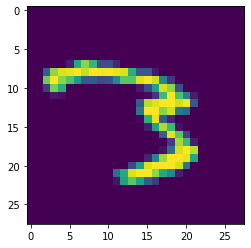

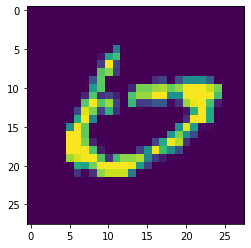

In [ ]:
for i in range(5):
    plt.figure()
    plt.imshow( fimages[i] )
    print( "{} -> {}".format( f_gtlabels[i], f_predictedlabels[i] ))

[[3 4 5 3 6 8 2]
 [7 9 5 6 7 7 6]
 [6 7 9 7 5 8 7]
 [9 3 9 8 9 7 5]
 [4 6 6 0 7 9 0]
 [5 9 9 9 9 2 5]
 [6 9 5 9 5 9 8]
 [3 5 3 6 6 1 7]
 [6 9 6 5 9 7 6]
 [7 2 7 9 1 9 7]
 [0 9 2 7 1 9 9]
 [5 9 7 6 5 6 8]
 [7 3 9 9 1 7 5]
 [3 5 3 5 5 5 5]
 [7 5 8 7 0 8 0]
 [6 8 4 2 5 7 8]
 [7 7 7 7 7 9 9]
 [2 6 2 5 5 2 5]]
[[8 2 3 2 0 2 7]
 [2 8 3 5 2 8 1]
 [5 2 4 1 7 3 2]
 [7 7 3 3 4 2 3]
 [8 0 1 8 2 0 2]
 [3 1 8 4 4 0 3]
 [1 4 8 4 3 4 0]
 [2 7 5 8 0 2 2]
 [0 1 4 0 3 2 8]
 [2 8 8 4 2 4 4]
 [2 8 7 4 4 7 4]
 [3 4 2 5 6 8 9]
 [2 5 8 4 8 2 3]
 [8 3 8 9 3 3 3]
 [2 3 9 1 9 2 8]
 [4 2 1 8 3 2 5]
 [2 2 2 2 2 4 7]
 [7 3 8 6 6 9 0]]


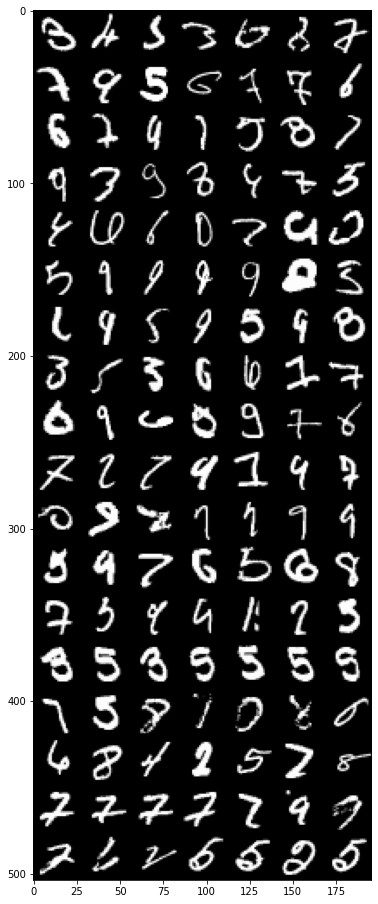

In [ ]:
ny = 18
nx = 7
width = height = 28

fimages = fimages.reshape( ny, nx, height, width).transpose(0,2,1,3).reshape( ny*height, nx*width )

plt.figure(figsize=(16,16))
plt.imshow( fimages, cmap='gray')

print(f_gtlabels.reshape(ny, nx))
print(f_predictedlabels.reshape(ny, nx))

In [ ]:
fimages.shape

(168, 476)